read the df

In [24]:
import io
import requests
import pandas as pd
import numpy as np

url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
iris=pd.read_csv(io.StringIO(s.decode('utf-8')))

iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


eda

In [27]:
iris.columns = ['a', 'b', 'c', 'd', 'e']

In [28]:
iris.dtypes

a    float64
b    float64
c    float64
d    float64
e     object
dtype: object

In [29]:
iris.describe()

,a,b,c,d
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
iris.corr()

,a,b,c,d
a,1.000000,-0.103784,0.871283,0.816971
b,-0.103784,1.000000,-0.415218,-0.350733
c,0.871283,-0.415218,1.000000,0.962314
d,0.816971,-0.350733,0.962314,1.000000


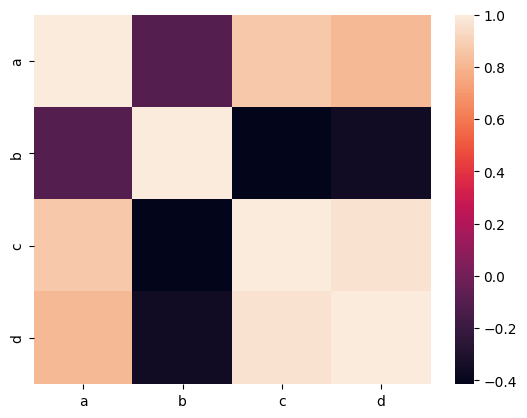

In [31]:
import seaborn as sns
sns.heatmap(iris.corr())

In [32]:
iris[iris['a']>6]['a'].count()

61

In [33]:
iris['a'].value_counts().index[0]

5.0

missing data

In [34]:
iris[iris.isnull().any(axis=1)]

,a,b,c,d,e


In [50]:
for col in iris.columns:
    print(col, iris[col].isna().sum()/len(iris))

a 0.0
b 0.0
c 0.0
d 0.0
e 0.0
f 0.0
e_cat 0.0


In [51]:
# mean median mode
iris.fillna(iris.mean(), inplace=True)

In [52]:
iris.dropna(axis = 0, how ='any', inplace=True)

In [38]:
# imputer
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

categorical

In [53]:
# label encoding
iris["e"] = iris["e"].astype('category')

In [54]:
iris.dtypes

a         float64
b         float64
c         float64
d         float64
e        category
f            int8
e_cat     float64
dtype: object

In [55]:
iris['f'] = iris['e'].cat.codes
iris.head()

,a,b,c,d,e,f,e_cat
0,4.9,3.0,1.4,0.2,Iris-setosa,0,0.0
1,4.7,3.2,1.3,0.2,Iris-setosa,0,0.0
2,4.6,3.1,1.5,0.2,Iris-setosa,0,0.0
3,5.0,3.6,1.4,0.2,Iris-setosa,0,0.0
4,5.4,3.9,1.7,0.4,Iris-setosa,0,0.0


In [56]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
iris["e_cat"] = ord_enc.fit_transform(iris[["e"]])
iris.head()

,a,b,c,d,e,f,e_cat
0,4.9,3.0,1.4,0.2,Iris-setosa,0,0.0
1,4.7,3.2,1.3,0.2,Iris-setosa,0,0.0
2,4.6,3.1,1.5,0.2,Iris-setosa,0,0.0
3,5.0,3.6,1.4,0.2,Iris-setosa,0,0.0
4,5.4,3.9,1.7,0.4,Iris-setosa,0,0.0


In [45]:
# one hot encoding
pd.get_dummies(iris, columns = ['e']).head()

,a,b,c,d,f,e_Iris-setosa,e_Iris-versicolor,e_Iris-virginica
0,4.9,3.0,1.4,0.2,0,1,0,0
1,4.7,3.2,1.3,0.2,0,1,0,0
2,4.6,3.1,1.5,0.2,0,1,0,0
3,5.0,3.6,1.4,0.2,0,1,0,0
4,5.4,3.9,1.7,0.4,0,1,0,0


In [49]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(iris[["e"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [46]:
# binary encoding


,a,b,c,d,e,f,e_cat
0,4.9,3.0,1.4,0.2,Iris-setosa,0,0.0
1,4.7,3.2,1.3,0.2,Iris-setosa,0,0.0
2,4.6,3.1,1.5,0.2,Iris-setosa,0,0.0
3,5.0,3.6,1.4,0.2,Iris-setosa,0,0.0
4,5.4,3.9,1.7,0.4,Iris-setosa,0,0.0


pda

In [ ]:
# sklearn pipeline
X = df_ml[feature_cols]
y = df_ml['price']

column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['fuel_type', 'make', 'drive_wheels']),
                                      (OrdinalEncoder(), ['aspiration']),
                                      remainder='passthrough')

linreg = LinearRegression()
pipe = make_pipeline(column_trans, linreg)

cross_val_score(pipe, X, y, cv=10, scoring='neg_mean_absolute_error').mean().round(2)